# t-SNE 

## SNE

In [166]:
from csv import reader
from math import log,sqrt
from random import randrange, seed
from statistics import mode
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time

In [279]:
def sqr_euclidean_distance(a,b):
    if isinstance(a, int) or isinstance(a, np.int32) or isinstance(a, float) or isinstance(a, np.float32):
        return (a - b)**2
    return sum([(xi - xj )**2 for xi,xj in zip(a,b)])
            
sqr_euclidean_distance(np.array([0,-1,2]),np.array([2,1,3]))

X = np.array([[1,2],
              [0,1],
              [5,6],
              [5,4]],dtype= np.float32)
Y =  np.array([1,3,-2,2],dtype=np.float32)

def pairwise_distance(X, i):
    # return dist(X[j], X[i]) for all j
    return np.array([sqr_euclidean_distance(X[i], X[j]) for j in range(0, len(X))])


def conditional_pji(X, i, sigmaSqr): # ~softmax
    # compute p_j|i for all j
    D = pairwise_distance(X, i)
    exp_vector = np.zeros(len(X))
    for j in range(len(X)):
        if j!=i:
            exp_vector[j] = np.exp(-D[j]/(2*sigmaSqr))
    return exp_vector/np.sum(exp_vector)


def join_pij(X, i, sigmaSqr):
    # compute pij = (p_i|j + p_j|i) / (2*N) for all j
    N = len(X)
    pi = np.zeros(N)
    for j in range(N):
        if j!=i:
            p_i_given_j = conditional_pji(X, i, sigmaSqr)[j]
            p_j_given_i = conditional_pji(X, j, sigmaSqr)[i]
            pi[j]= (p_i_given_j + p_j_given_i) / (2 * N) # N: nums of dimension
    return pi

# def join_p(X, sigmaSqr = 3): # sai
#     # return p12, p13, p14, ... ,p23, p24, ...
#     prob = []
#     for a in range(len(X)-1):
#         for b in range(a+1, len(X)):
#             prob.append(join_pij(X, a, b, sigmaSqr))
#     return prob

def pairwise_distance_all(X):
    # 12 13,..., 23,..., 34,...
    pair = []
    for i in range(0,len(X)-1):
        for j in range(i+1, len(X)):
            pair.append(sqr_euclidean_distance(X[i], X[j]))
    return np.array(pair)

def t_dist(D): # t-distribution with D = dist^2
    return  1/(1+D)

def join_qij(Y, i):
    # Numerator
    D = pairwise_distance(Y, i)
    t_vector = t_dist(D)
    t_vector[i] = 0 # qii = 0
    # Denominator
    D_all = pairwise_distance_all(Y)
    prob_vector= t_dist(D_all) 
    return t_vector/np.sum(prob_vector)

# def join_q(Y):
#     # return p12, p13, p14, ... ,p23, p24, ...
#     t_dist = lambda D: 1/(1+D) # t-distribution with D is dist^2
#     D_all = pairwise_distance_all(Y)
#     prob_vector= t_dist(D_all)
#     return prob_vector/np.sum(prob_vector)

In [308]:
def gradient(X, Y, sigmaSqr = 3):
    N = len(X)
    grad = np.zeros(N)
    for i in range(N):
        pi = join_pij(X, i, sigmaSqr) # vector pi[0,1,...j]
        qi = join_qij(Y, i) # vector qi[0,1,...j]
        
        D = pairwise_distance(Y, i)
        t_vector = t_dist(D)
        t_vector[i] = 0 #  qii = 0
        grad[i] = 4* np.sum((pi - qi)*(Y[i]-Y)*t_vector)
    return grad
def gradient_descent(X, Y, sigmaSqr = 3, num_iter=10, lr = 10):
    params = Y
#     print(f'Iteration :{0}, params = \n{params}')
    for i in range(num_iter):
        grad = gradient(X, params, sigmaSqr)
        params = params - lr*grad
#         plot(params)
#         print(f'Iteration :{i+1}, params = \n{params}')
    return params

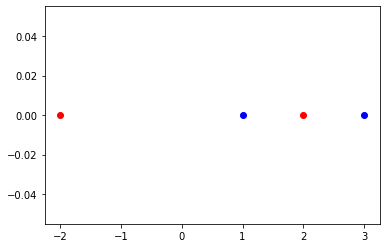

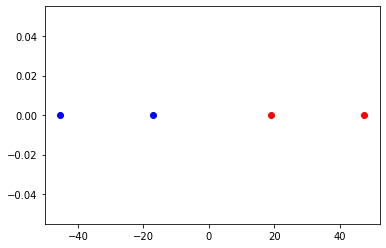

In [281]:
params = gradient_descent(X,Y,sigmaSqr=5, num_iter=100)
def plot(params):
    plt.scatter(params[:2], np.zeros(len(params[:2])), c='b')
    plt.scatter(params[2:], np.zeros(len(params[2:])), c='r')
    plt.show()
plot(Y)
plot(params)

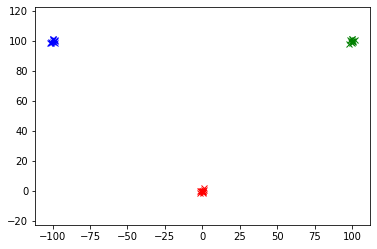

In [317]:
N = 10
mean1 = [0, 0]
mean2 = [100, 100]
mean3 = [-100, 100]
cov1 = [[1, 0], [0, 1]]
X1 = np.random.multivariate_normal(mean1, cov, N)
X2 = np.random.multivariate_normal(mean2, cov, N)
X3 = np.random.multivariate_normal(mean3, cov, N)
# plt.plot(X2.T[0],X2.T[1], 'x')
# plt.plot(X2.T[0],X2.T[1], 'x')
plt.axis('equal')
# plt.show()

Y = np.random.normal(0, 1e-5, size = 3*N)
X = np.vstack((X1,X2,X3))
plt.plot(X1.T[0],X1.T[1], 'rx')
plt.plot(X2.T[0],X2.T[1], 'gx')
plt.plot(X3.T[0],X3.T[1], 'bx')

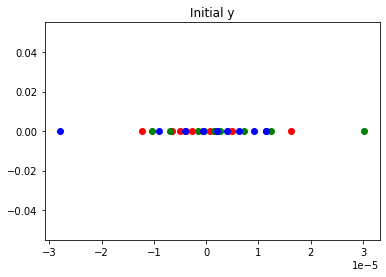

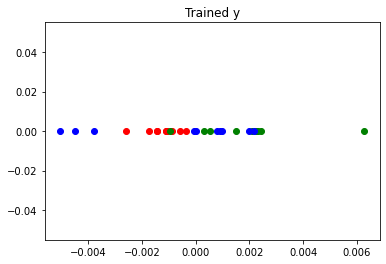

In [322]:
params = gradient_descent(X,Y,sigmaSqr=1, num_iter=5)
def plot(params):
    N = int(len(params)/3)
    plt.scatter(params[:N], np.zeros(N), c='r')
    plt.scatter(params[N:2*N], np.zeros(N), c='g')
    plt.scatter(params[2*N:], np.zeros(N), c='b')
    plt.show()

plt.title("Initial y")
plot(Y)
plt.title("Trained y")
plot(params)

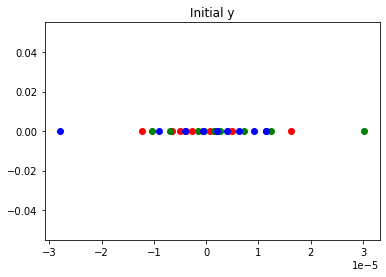

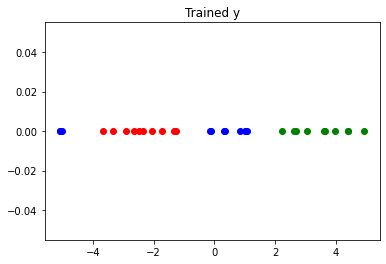

In [325]:
params = gradient_descent(X,Y,sigmaSqr=1, num_iter=20)
def plot(params):
    N = int(len(params)/3)
    plt.scatter(params[:N], np.zeros(N), c='r')
    plt.scatter(params[N:2*N], np.zeros(N), c='g')
    plt.scatter(params[2*N:], np.zeros(N), c='b')
    plt.show()

plt.title("Initial y")
plot(Y)
plt.title("Trained y")
plot(params)

## Refs:
https://nlml.github.io/in-raw-numpy/in-raw-numpy-t-sne/